# folium이란?

In [1]:
# folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 아주 쉽게 도와준다.

# leaflet.js를 기반으로 만들어졌다.

# 지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력할 수 있다.

# 출처: https://python-visualization.github.io/folium/index.html

In [2]:
import folium
import pandas as pd

## folium 간단한 예제 

In [3]:
# 우리가 현재 위치한 곳의 위도와 경도 정보
# 위도와 경도 각각을 latitude, longitude에 저장해봅시다.

# 플레이데이터 독산 위도, 경도
latitude, longtitude = (37.468251, 126.886212)

In [4]:
# 해당 위도, 경도 정보를 바탕으로 지도에 표시해자.
# 또 Marker를 달아 위치에 대한 정보에 ‘플레이데이터'라고 표기해보자.

m = folium.Map(location = [latitude, longtitude],
               zoom_start = 17, # zoom_start 숫자가 커지면 확대가 된 상태로 시작한다.
               width = 750,
               height = 500
              )
folium.Marker([latitude, longtitude],
              popup = "플레이데이터",
              tooltip = "플레이데이터").add_to(m)
m

# Stack OVerflow Annual Developer Survey 데이터 불러오기

In [5]:
# survey_results_public.csv 파일을 불러오기

survey_raw_df = pd.read_csv("C:/python/datas/survey_results_public.csv", 
                            index_col = ["ResponseId"])

In [6]:
# 국가별 위치가 기록된 json 파일 주소를 countries_geojson에 담기
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

## 지도에 활용할 DataFrame 만들기 

In [7]:
# survey_raw_df로부터 Country 컬럼에 대한 정보만 추려온다.
# 국가별 설문 응답 데이터의 개수를 활용하여 지도에 표기할 예정

# 각 Column의 name은 Country, Count로 했다
# (무엇으로 해도 상관 없다.).

country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index,
                                  'Count' : country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

## 데이터 가공하기

In [8]:
# json 속성 feature.properties.name의 값과 우리가 csv에서 가져온 
# country name이 일치해야 한다.

# 이중 Russian Federation의 값이 불일치한데, 이를 Russia로 변경해준다.

country_counts_df.at[12, 'Country']

'Russian Federation'

In [9]:
country_counts_df.at[12, 'Country'] = "Russia"

## folium으로 지도 그리기

In [10]:
import requests
import json

In [11]:
data_dict = requests.get(countries_geojson).json()

In [12]:
data_dict

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AFG',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[61.210817, 35.650072],
      [62.230651, 35.270664],
      [62.984662, 35.404041],
      [63.193538, 35.857166],
      [63.982896, 36.007957],
      [64.546479, 36.312073],
      [64.746105, 37.111818],
      [65.588948, 37.305217],
      [65.745631, 37.661164],
      [66.217385, 37.39379],
      [66.518607, 37.362784],
      [67.075782, 37.356144],
      [67.83, 37.144994],
      [68.135562, 37.023115],
      [68.859446, 37.344336],
      [69.196273, 37.151144],
      [69.518785, 37.608997],
      [70.116578, 37.588223],
      [70.270574, 37.735165],
      [70.376304, 38.138396],
      [70.806821, 38.486282],
      [71.348131, 38.258905],
      [71.239404, 37.953265],
      [71.541918, 37.905774],
      [71.448693, 37.065645],
      [71.844638, 36.738171],
      [72.193041, 36.948288],
      [72.63689, 37.047

In [13]:
# Choropleth는 데이터를 담고 있는 Pandas DataFrame/Series와 기하학 데이터를 담는
# Geo/TopoJSON를 바인딩하여 쉽게 시각화 표현할 수 있도록 돕는다.

m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name', # json파일의 구조내에 원하는 스트링들의 위치
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000], # 구간별 색깔
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m) # 오른쪽 상단에 있는 stack 모양의 아이콘

m
# 지도에 색상이 인코딩되어 표현되어 있다.

# 지도 결과 저장하기

In [14]:
# 해당 객체에 save() 메서드를 사용하면 저장할 수 있다.

m.save("Country.html")

# 해당 파일을 열면 우리가 실행 결과로 얻었던 지도의 모습을 웹 브라우저를 통해 확인할
# 수 있다.

# 예제2

In [15]:
# 서울시 행정구역에 대한 geojson

seoul_geojson = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(
    location = [37.57, 126.99],
    zoom_start = 11
)

folium.Choropleth(
    geo_data = seoul_geojson,
    fill_color = "#22AA44",
    fill_opacity = 0.4,
    line_opacity = 1
).add_to(m)

m

In [16]:
# 다른 정보가 더 필요하다면 아래 링크에서 찾기

# https://python-visualization.github.io/folium/quickstart.html

# Wordcloud이란?

In [17]:
# 문자열 내에 단어의 빈도에 따라서 시각화를 진행한다. 
# 빈도가 많을 수록 글씨를 크게 표현해서 그림을 그린다. 
# 다음과 같은 특징을 갖는다.

# - 사용 가능한 모든 공간을 글자로 채운다.
# - Mask를 사용해서 원하는 모양으로 만들 수 있다.

# 출처: https://amueller.github.io/word_cloud/

# 예제:
# https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

In [18]:
from wordcloud import WordCloud

In [19]:
# survey_results_public.csv 파일을 불러오기
survey_raw_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

## 데이터 가공하기

In [20]:
temp_words = survey_raw_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [21]:
# DevType은 앞서 파악했듯이 두 개 이상의 값을 선택할 수 있는 질문이다. 
# 복수개의 값의 구분자는 세미콜론(;)이다. 
# 세미콜론을 공백으로, 또 콤마(,)도 공백으로 변경한다.
# 즉 전체 문자열 내에 단어를 공백으로 구분하는 단 하나의 문자열을 만든다.

temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [22]:
# 문자열 값을 갖는 Series 내의 값을 단 하나의 문자열로 만들기 위해서 join() 메서드를 활용

# 결과적으로 words라는 변수에 Series에 있는 모든 단어를 공백이란 구분자를 통해 단
# 하나의 문자열로 합쳤다.

words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

## wordcloud 생성 후 그림으로 출력하기

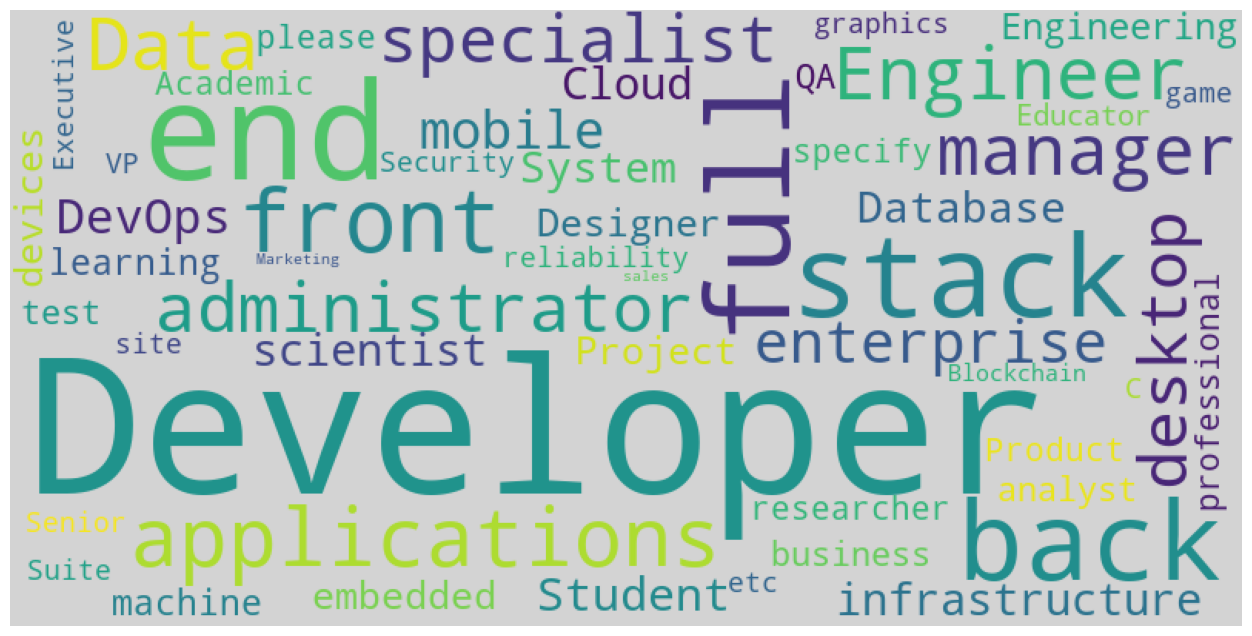

In [23]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path = ['폰트 경로']
# max_font_size = 60 --> 최대 글자 크기를 지정한다.

import matplotlib.pyplot as plt

wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400, 
               background_color='lightgrey').generate(words)
plt.figure(figsize=(16,8))

# x, y축을 그리지 않는다.
plt.axis('off')

# grid lines를 그리지 않는다.
plt.grid(False)
plt.imshow(wc)
plt.show()

## wordcloud 그림 저장하기

In [24]:
wc.to_file("DevType.png")